In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [2]:
P = npt.NDArray[np.int32]
ps: list[P] = []

with open("./test3.txt", "r") as f:
    x, y = map(int, f.readline().split())
    z = int(f.readline())
    while s := f.readline():
        p = np.array(list(map(int, s.split())))
        ps.append(p)

In [3]:
pdops: npt.NDArray[np.float64] = np.ndarray((x, y), dtype=np.float64)

In [4]:
class calc:
    @staticmethod
    def pdop(t: P, ps: list[P]) -> np.float64:
        if any(np.array_equal(t, p) for p in ps):
            return np.nan

        J = calc.jacobian(ps, t)

        mult = np.matmul(J.T, J)
        inv = np.linalg.inv(mult)
        return np.sqrt(inv[0][0] + inv[1][1] + inv[2][2])

    @staticmethod
    def jacobian(ps: list[P], t: P) -> npt.NDArray[np.float64]:
        J: npt.NDArray[np.float64] = np.ones(shape=(len(ps), 3), dtype=np.float64)
        for i, p in enumerate(ps):
            distance = np.linalg.norm(p - t, ord=2)
            for j in range(3):
                J[i][j] = -(p[j] - t[j]) / distance

        return J

In [5]:
for i in range(x):
    for j in range(y):
        pdops[i][j] = calc.pdop(np.array((i, j, z)), ps)

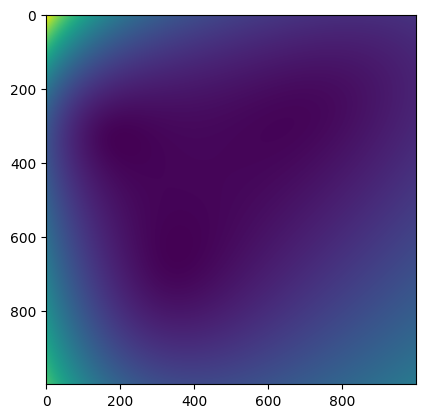

In [6]:
plt.imshow(pdops)

In [7]:
print(pdops.min(), pdops.max())

1.7851882847458398 49.62276210321301


In [8]:
a = np.reshape(np.fromfile("./output/pdop.dat", dtype=np.float64), (1000, 1000))

3.469580178716569e-11
-4.3158365770068485e-11


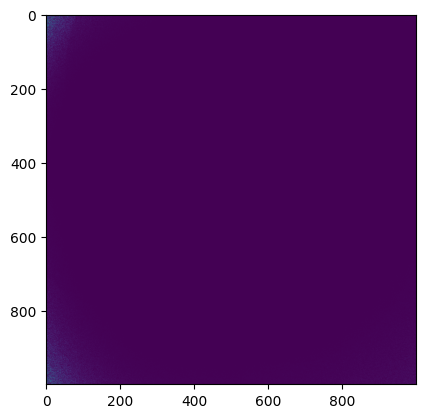

In [9]:
plt.imshow(abs(pdops - a))
print((pdops - a).max())
print((pdops - a).min())